## Проект: Линейные модели в машинном обучении

[yandex practicum link](https://practicum.yandex.ru/learn/data-scientist/courses/de273a30-17f9-476d-8f2f-ff55c7fe17fb/sprints/197573/topics/2fdf9dfb-8a1d-463d-9695-4a95fc16cdcf/lessons/6871f4e2-79b3-4902-975f-f5760c64b759/)

### Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». <font color='red'>Он хочет купить бурёнок, чтобы расширить поголовье стада коров.</font>  Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы <font color='red'>каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. </font> А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать <font color='green'>**две прогнозные модели**</font>  для отбора бурёнок в поголовье:
1) Первая будет прогнозировать возможный удой коровы (<font color='red'>целевой признак Удой</font>);

2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы (<font color='red'>целевой признак Вкус молока</font>).

С помощью модели нужно отобрать коров по двум критериям:
- <font color='red'>средний удой за год — не менее 6000 килограммов;</font>
- <font color='red'>молоко должно быть вкусным.</font>

### Описание данных

Файл ferma_main

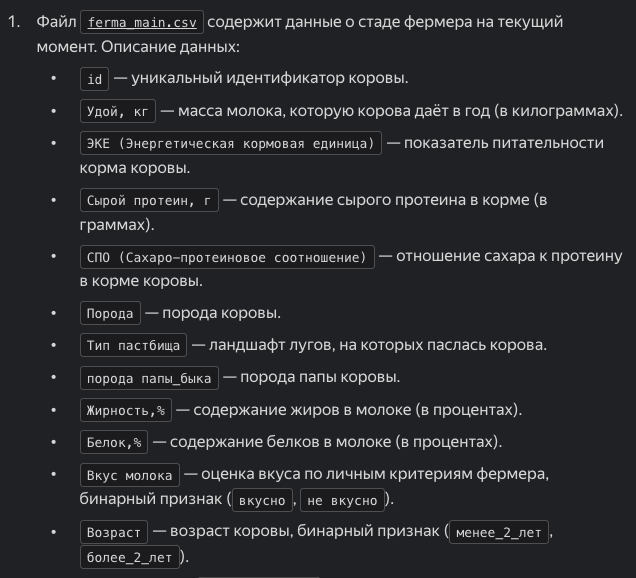

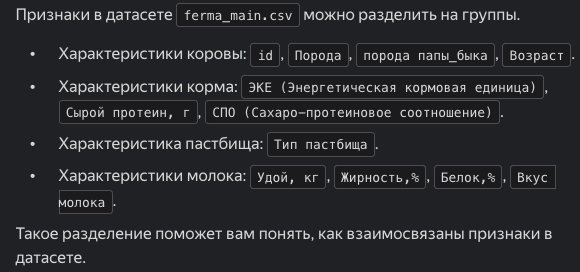

Файлы ferma_dad и cow_buy

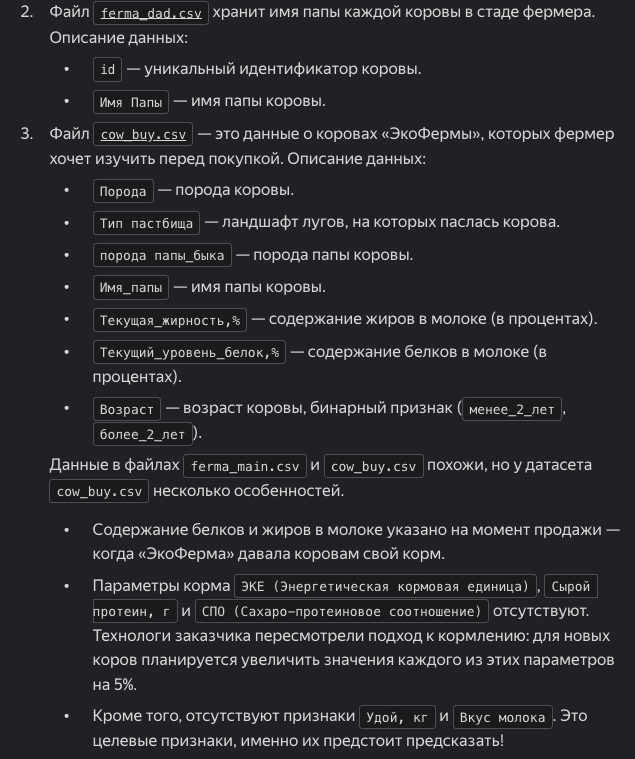

### Шаг 1. Загрузка и изучение данных

In [3]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [4]:
try:
    ferma_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad_df= pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except FileNotFoundError:
    ferma_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_main.csv', sep=';')
    ferma_dad_df= pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/cow_buy.csv', sep=';')

#### Основной датасет по коровам

In [5]:
ferma_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [6]:
ferma_df.shape

(634, 12)

In [7]:
ferma_df.id.nunique()

629

Так, строк в датасете 634, а коров - 629. Значит id 5 коров повторяются. Запомнили

Поменяем название столбцов:
- переведем на английский
- устраним пробелы

In [8]:
ferma_df.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [9]:
ferma_df.rename(columns={
                        'Удой, кг':'milk_yield_kg',
                        'ЭКЕ (Энергетическая кормовая единица)':'energy_feed_unity',
                        'Сырой протеин, г': 'crude_protein_g',
                        'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
                        'Порода':'cow_breed',
                        'Тип пастбища':'pasture_type',
                        'порода папы_быка':'bull_breed',
                        'Жирность,%': 'milk_fat_percent',
                        'Белок,%' : 'percent_protein_in_milk',
                        'Вкус молока': 'milk_taste',
                        'Возраст':'cow_age'
                    
}, inplace=True)

In [10]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


#### Датасет по связи коров с быками (кто отец коровы)

In [11]:
ferma_dad_df.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [12]:
ferma_dad_df.shape

(629, 2)

Все верно, всего 629 уникальных коров, информация соответствует инфе из основного датасета

Посмотрим, сколько всего уникальных отцов-быков

In [13]:
ferma_dad_df['Имя Папы'].nunique()

4

Всего 4 быка. Посмотрим их имена

In [14]:
ferma_dad_df['Имя Папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Переведем название столбца Имя Папы в удобный вид

In [15]:
ferma_dad_df.rename(columns={'Имя Папы': 'bull_name'}, inplace=True)

In [16]:
ferma_dad_df.head()

,id,bull_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


#### Датасет о коровах, которых планируют купить

In [17]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [18]:
cow_buy_df.shape

(20, 7)

Переименуем столбцы

In [19]:
cow_buy_df.rename(columns={
                            'Порода': 'cow_breed',
                            'Тип пастбища': 'pasture_type',
                            'порода папы_быка': 'bull_breed',
                            'Имя_папы':'bull_name',
                            'Текущая_жирность,%': 'milk_fat_percent',
                            'Текущий_уровень_белок,%': 'percent_protein_in_milk',
                            'Возраст':'cow_age'

}, inplace=True)

In [20]:
cow_buy_df.head()

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


всего 20 коров рассматриватся к приобретению

### Шаг 2. Предобработка данных

#### 2.1 Основной датасет по коровам

- проверить наличие пустых значений
- проверить корректность типов данных
- проверить явные и неявные дубликаты
- трансформировать колонку milk_taste (1 - вкусно, 0 - не вкусно)
- трансформировать колонку cow_age на классы - в зависимости от того, сколько их

##### 2.1.1 Пустые значения

In [21]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       634 non-null    int64 
 1   milk_yield_kg            634 non-null    int64 
 2   energy_feed_unity        634 non-null    object
 3   crude_protein_g          634 non-null    int64 
 4   sugar_protein_ratio      634 non-null    object
 5   cow_breed                634 non-null    object
 6   pasture_type             634 non-null    object
 7   bull_breed               634 non-null    object
 8   milk_fat_percent         634 non-null    object
 9   percent_protein_in_milk  634 non-null    object
 10  milk_taste               634 non-null    object
 11  cow_age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


Пустых значений нет

##### 2.1.2 Корректность типов данных

Столбцы energy_feed_unity,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk нужно перевести в тип данных float

Причем, сами значения разделены запятой, а должны быть разделены точкой.

Используем функцию и применим к этим столбцам

In [22]:
columns=['energy_feed_unity', 
          'sugar_protein_ratio',
          'milk_fat_percent', 
          'percent_protein_in_milk']

ferma_df[columns] = ferma_df[columns]\
          .apply(lambda x: x.str.replace(',','.').astype('float'))

In [23]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       634 non-null    int64  
 1   milk_yield_kg            634 non-null    int64  
 2   energy_feed_unity        634 non-null    float64
 3   crude_protein_g          634 non-null    int64  
 4   sugar_protein_ratio      634 non-null    float64
 5   cow_breed                634 non-null    object 
 6   pasture_type             634 non-null    object 
 7   bull_breed               634 non-null    object 
 8   milk_fat_percent         634 non-null    float64
 9   percent_protein_in_milk  634 non-null    float64
 10  milk_taste               634 non-null    object 
 11  cow_age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [24]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


##### 2.1.3 Явные и неявные дубликаты

In [25]:
ferma_df.duplicated().sum()

5

In [26]:
ferma_df[ferma_df.duplicated()]

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,milk_taste,cow_age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [27]:
ferma_df.drop_duplicates(inplace=True)

In [28]:
ferma_df.duplicated().sum()

0

Избавились от явных дубликатов

In [29]:
ferma_df.id.nunique()


629

В датасете осталось 629 коров с уникальным id. Это означает, что каждая корова уникальна. Даже если некоторые данные у разных коров совпадают.

неявных дубликатов быть не может

##### 2.1.4 Трансформация колонки milk_taste

In [30]:
ferma_df.milk_taste.unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [31]:
ferma_df.milk_taste = ferma_df.milk_taste.apply(lambda x: 1 if x=='вкусно' else 0)

заодно уточним название столбца

In [32]:
ferma_df.rename(columns={'milk_taste':'is_tasty'}, inplace=True)

In [33]:
ferma_df.sample(5)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,is_tasty,cow_age
101,102,6013,15.7,1755,0.93,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.074,1,более_2_лет
529,530,6642,15.7,1984,0.94,Вис Бик Айдиал,Равнинное,Айдиал,3.72,3.072,1,более_2_лет
578,579,5235,12.2,1724,0.86,РефлешнСоверинг,Холмистое,Соверин,3.28,3.078,0,менее_2_лет
217,218,6559,14.7,1796,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.71,3.073,0,более_2_лет
372,373,6600,15.6,1971,0.94,Вис Бик Айдиал,Равнинное,Айдиал,3.73,3.076,1,более_2_лет


##### 2.1.5 Трансформация колонки cow_age

In [34]:
ferma_df.cow_age.unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

классов "Возраст" всего два. Заменим их на бинарную классификацию: старше 2 лет = 1, младше = 0

Причем будем считать молодой коровой - до двух лет, старой - более двух лет (для имени столбца)

In [35]:
ferma_df.cow_age = ferma_df.cow_age.apply(lambda x: 1 if x=='более_2_лет' else 0)

In [36]:
ferma_df.rename(columns={'cow_age':'is_old'}, inplace=True)

In [37]:
ferma_df.sample(5)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
38,39,5702,13.3,1745,0.895,Вис Бик Айдиал,Равнинные,Айдиалл,3.49,3.075,0,1
229,230,5877,12.5,1926,0.890,Вис Бик Айдиал,Холмистое,Айдиал,3.27,3.078,1,1
478,479,5882,12.8,1746,0.850,Вис Бик Айдиал,Равнинное,Соверин,3.41,3.077,0,1
359,360,5529,13.4,1733,0.890,РефлешнСоверинг,Холмистое,Соверин,3.34,3.072,0,0
58,59,6274,14.8,2264,0.930,Вис Бик Айдиал,Холмистое,Айдиалл,3.53,3.081,1,1


In [38]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   milk_yield_kg            629 non-null    int64  
 2   energy_feed_unity        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   cow_breed                629 non-null    object 
 6   pasture_type             629 non-null    object 
 7   bull_breed               629 non-null    object 
 8   milk_fat_percent         629 non-null    float64
 9   percent_protein_in_milk  629 non-null    float64
 10  is_tasty                 629 non-null    int64  
 11  is_old                   629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 63.9+ KB


##### 2.1.6 Выводы 

- пустых значений нет
- дубликаты убрали
- типы данных исправили
- столбцы вкус молока (1-вкусно, 0 - невкусно) и возраст коровы (1-старше 2 лет, 0 - младше) привели в бинарный вид

#### 2.2 Предобработка датасета по быкам

In [39]:
ferma_dad_df.head()

,id,bull_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Повторы быков будут - их всего 4 шт на ферме. каждой корове (их 629) соответствует свой папа-бык.

предобработки не требуется

#### 2.3 Предобработка датасета по покупным коровам

Помним, что их 20 шт, посмотрим на весь датасет

Еще раз запомним тот факт, что данные в столбцах milk_fat_percent и percent_protein_in_milk - Содержание белков и жиров в молоке указаны на момент продажи — <font color='red'>когда «ЭкоФерма» давала коровам свой корм.</font> 

In [40]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


Кстати, примечательно, что порода папы-быка отнюдь не является определяющим породы коровы. Породы папы и дитя могут отличаться.

и еще одна особенность данных: порода быка определена одним словом, а порода коровы - несколькими.

Например, порода быка "Соверин", а коровы "РефлешнСоверинг"

Возможно, потребуется привести данные в один формат

In [41]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cow_breed                20 non-null     object
 1   pasture_type             20 non-null     object
 2   bull_breed               20 non-null     object
 3   bull_name                20 non-null     object
 4   milk_fat_percent         20 non-null     object
 5   percent_protein_in_milk  20 non-null     object
 6   cow_age                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


А так, "проблемы" в общем-то те же:

- посмотреть пустые значения - их нет
- заменить типы данных для столбцов milk_fat_percent и percent_protein_in_milk на float 
- посмотреть дубликаты
- трансформировать столбец cow_age

In [42]:
cow_buy_df[['milk_fat_percent', 'percent_protein_in_milk']] =  cow_buy_df[['milk_fat_percent', 'percent_protein_in_milk']]\
    .apply(lambda x: x.str.replace(',','.').astype('float'))

In [43]:
cow_buy_df.duplicated().sum()

4

In [44]:
cow_buy_df[cow_buy_df.duplicated()]

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [45]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Да, целых 4 дубликата, уберем их

In [46]:
cow_buy_df.drop_duplicates(inplace=True)

In [47]:
cow_buy_df.duplicated().sum()

0

In [48]:
cow_buy_df.reset_index(drop=True, inplace=True)

In [49]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,cow_age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


Всего 16 коров для покупки

Трансформируем столбец с возрастом коровы по принципу пункта 2.1.5 для основного датасета

In [50]:
cow_buy_df.cow_age = cow_buy_df.cow_age\
    .apply(lambda x: 1 if x=='более_2_лет' else 0)

In [51]:
cow_buy_df.rename(columns={'cow_age': 'is_old'}, inplace=True)

In [52]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,1
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,1
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,1
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,0
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,1
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,0
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,1
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,1


Выводы по датасету с коровами для покупки

- пустых значений нет
- дубликаты убрали - всего 16 коров
- колонку с возрастом коров преобразовали
- вероятно потребуется трансформация колонок с породами: видно, что их всего две (Соверин и Айдиал), причем для основного датасета коров фермы тоже

#### 2.4  Породы коров и быков

Посмотрим еще раз на породы коров и быков в обоих датасетах: существующие на ферме и доступные к продаже

In [53]:
# породы коров на ферме
ferma_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [54]:
# породы быков-отцов коров на ферме
ferma_df.bull_breed.unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [55]:
# породы коров на продажу
cow_buy_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [56]:
# породы быков-отцов коров на продажу
cow_buy_df.bull_breed.unique()

array(['Айдиал', 'Соверин'], dtype=object)

Вывод:
- всего в данных изучаются два типа пород коров и быков - "Соверин" и "Айдиал" (соответствует [статье](https://studbooks.net/1129082/agropromyshlennost/osnovnye_linii_golshtinskogo_skota) о "линиях" или породах коров)

- нашлись опечатки в породе быков-отцов коров на ферме (Айдиалл и Айдиал)

Приведем все к единому виду - и для коров и для быков в обоих датасетах

In [57]:
def rename_breed(some_name):
    
    if some_name == 'Вис Бик Айдиал' or  some_name == 'Айдиалл':
        some_name= 'Айдиал'
    elif some_name== 'РефлешнСоверинг':
        some_name= 'Соверин'
    else: some_name= some_name
    return some_name

In [62]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(rename_breed)
        

In [63]:
cow_buy_df

,cow_breed,pasture_type,bull_breed,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,1
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,0
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,1
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,1
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,1
5,Соверин,равнинное,Соверин,Геркулес,3.63,3.053,0
6,Айдиал,равнинное,Соверин,Буйный,3.57,3.079,1
7,Соверин,холмистое,Айдиал,Буйный,3.40,3.079,0
8,Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,1
9,Соверин,равнинное,Соверин,Геркулес,3.73,3.073,1


In [64]:
ferma_df.sample(10)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_breed,pasture_type,bull_breed,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
160,161,5766,14.1,1869,0.89,Айдиал,Равнинное,Соверин,3.59,3.077,0,1
521,522,5266,12.9,1697,0.84,Соверин,Холмистое,Соверин,3.72,3.077,0,0
171,172,6441,14.1,2109,0.94,Айдиал,Равнинное,Айдиал,3.73,3.080,1,1
301,302,5896,12.8,1853,0.84,Айдиал,Холмистое,Айдиал,3.18,3.078,0,1
451,452,6997,15.4,2002,0.94,Соверин,Холмистое,Айдиал,3.71,3.072,0,1
428,429,5860,12.6,1719,0.88,Соверин,Холмистое,Айдиал,3.21,3.073,1,1
32,33,6930,15.7,1788,0.94,Соверин,Холмистое,Айдиал,3.72,3.079,1,1
559,560,5764,13.8,2051,0.88,Соверин,Холмистое,Соверин,3.63,3.074,0,1
600,601,6229,15.6,2133,0.94,Соверин,Холмистое,Соверин,3.72,3.075,1,1
244,245,6572,16.2,1757,0.94,Айдиал,Холмистое,Соверин,3.72,3.075,1,1


- привели породы коров и быков к одному формату (Айдиал и Соверин)
- устранили опечатку

На этом этапе можно перевести породы быков и коров в бинарный вид (их всего два)

Пусть Соверин - это класс 1, Айдиал - класс 0

In [67]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(lambda x: 1 if x=='Соверин' else 0)
    dataset.rename(columns={'cow_breed': 'cow_is_sovering', 'bull_breed':'bull_is_sovering'}, inplace=True)    

    

In [68]:
ferma_df.sample(10)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_type,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
160,161,5766,14.1,1869,0.890,0,Равнинное,1,3.59,3.077,0,1
446,447,6753,14.3,2080,0.930,1,Холмистое,0,3.72,3.077,0,1
2,3,5810,14.0,1854,0.885,1,Холмистое,1,3.59,3.074,0,1
112,113,6345,15.8,1715,0.930,0,Холмистое,1,3.73,3.078,1,1
340,341,5497,14.7,1751,0.840,0,Равнинное,0,3.18,3.074,0,0
198,199,6418,15.4,1998,0.940,0,Холмистое,1,3.73,3.080,1,1
20,21,6752,15.5,1924,0.930,1,Холмистое,0,3.73,3.078,1,1
449,450,6574,15.8,1999,0.940,1,Равнинное,0,3.72,3.075,1,1
201,202,6473,16.5,2033,0.950,0,Холмистое,1,3.73,3.078,1,1
514,515,6415,15.3,1865,0.940,1,Равнинное,0,3.72,3.076,0,1


In [69]:
cow_buy_df

,cow_is_sovering,pasture_type,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,0,холмистое,0,Геркулес,3.58,3.076,1
1,0,равнинное,1,Буйный,3.54,3.081,0
2,1,равнинное,1,Барин,3.59,3.074,1
3,1,холмистое,0,Буйный,3.40,3.061,1
4,1,равнинное,0,Буйный,3.64,3.074,1
5,1,равнинное,1,Геркулес,3.63,3.053,0
6,0,равнинное,1,Буйный,3.57,3.079,1
7,1,холмистое,0,Буйный,3.40,3.079,0
8,0,холмистое,1,Соловчик,3.73,3.055,1
9,1,равнинное,1,Геркулес,3.73,3.073,1


#### 2.5 Тип пастбища 


In [74]:
ferma_df.pasture_type.unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [75]:
cow_buy_df.pasture_type.unique()

array(['холмистое', 'равнинное'], dtype=object)

Результат: нужно привести к единому виду (нижний регистр, единое склонение) - так мы приведем тип пастбищ к двум классам и сразу же изменим их на бинарную классификацию: 
- назовем столбец is_hill 
- 1 - холмистая местность
- 0 - равнинная  

In [81]:
for dataset in [ferma_df, cow_buy_df]:
    dataset.pasture_type = dataset.pasture_type\
        .apply(lambda x: 1 if x in (['холмистое', 'Холмистое']) else 0)
    dataset.rename(columns={'pasture_type': 'pasture_is_hill'}, inplace=True)
        

In [83]:
ferma_df.sample(5)

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old
618,619,6692,15.8,2028,0.940,0,0,0,3.73,3.079,1,1
225,226,6755,15.9,1816,0.930,0,0,0,3.73,3.074,1,1
9,10,5339,13.4,1791,0.895,0,1,1,3.13,3.075,1,0
139,140,5833,14.1,1977,0.890,0,0,0,3.58,3.078,1,1
404,405,6638,15.8,2334,0.950,1,1,1,3.72,3.078,1,1


In [84]:
cow_buy_df

,cow_is_sovering,pasture_is_hill,bull_is_sovering,bull_name,milk_fat_percent,percent_protein_in_milk,is_old
0,0,1,0,Геркулес,3.58,3.076,1
1,0,0,1,Буйный,3.54,3.081,0
2,1,0,1,Барин,3.59,3.074,1
3,1,1,0,Буйный,3.40,3.061,1
4,1,0,0,Буйный,3.64,3.074,1
5,1,0,1,Геркулес,3.63,3.053,0
6,0,0,1,Буйный,3.57,3.079,1
7,1,1,0,Буйный,3.40,3.079,0
8,0,1,1,Соловчик,3.73,3.055,1
9,1,0,1,Геркулес,3.73,3.073,1


Напоследок примерджим имя быка к датасету фермы - и больше не будем обращаться к ferma_dad_df

In [95]:
ferma_df = ferma_df.merge(ferma_dad_df,
               how='left',
               on='id')

In [96]:
ferma_df.head()

,id,milk_yield_kg,energy_feed_unity,crude_protein_g,sugar_protein_ratio,cow_is_sovering,pasture_is_hill,bull_is_sovering,milk_fat_percent,percent_protein_in_milk,is_tasty,is_old,bull_name
0,1,5863,14.2,1743,0.890,0,0,0,3.58,3.076,1,1,Буйный
1,2,5529,12.8,2138,0.890,0,0,1,3.54,3.079,1,0,Соловчик
2,3,5810,14.0,1854,0.885,1,1,1,3.59,3.074,0,1,Барин
3,4,5895,12.4,2012,0.885,1,1,0,3.40,3.075,0,1,Буйный
4,5,5302,12.8,1675,0.885,0,0,1,3.73,3.073,1,0,Барин


#### 2.5 Выводы по шагу 2



Посмотрим, что у нас получилось в итоге

In [97]:
for dataset in [ferma_df, ferma_dad_df, cow_buy_df]:
    print(dataset.info())
    print(dataset.shape)
    print(dataset.duplicated().sum())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   milk_yield_kg            629 non-null    int64  
 2   energy_feed_unity        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   cow_is_sovering          629 non-null    int64  
 6   pasture_is_hill          629 non-null    int64  
 7   bull_is_sovering         629 non-null    int64  
 8   milk_fat_percent         629 non-null    float64
 9   percent_protein_in_milk  629 non-null    float64
 10  is_tasty                 629 non-null    int64  
 11  is_old                   629 non-null    int64  
 12  bull_name                629 non-null    object 
dtypes: float64(4), int64(8), object(1)
memory usage: 68.8+ KB
None
(629, 13)
0

<cla

1) пустые значения убрали

2) типы данных привели в порядок
3) дубликаты удалили
4) колонки с категориальными признаками привели в бинарный вид: 
    - cow_is_sovering, bull_is_sovering (1 - порода Соверин, 0 - порода Айдиал)
    - is_tasty (1- вкусное молоко, 0 - невкусное)
    - pasture_is_hill (1 - холмистое пастбище, 0 - равнинное)
    - is_old (1 - корова старше 2 лет, 0 - младше двух лет)

5) остается только колонка bull_name с именами быков-отцов. Их всего 4 вида:
    - Буйный
    - Соловчик
    - Барин
    - Геркулес

Это категориальный признак, с ним решим на этапе подготовки данных

### Шаг 3. Исследовательский анализ данных

#### 3.1 Статистический анализ данных



In [98]:
print('Статистические параметры датасета Ферма')
ferma_df.describe().T

Статистические параметры датасета Ферма


,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
milk_yield_kg,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
energy_feed_unity,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
crude_protein_g,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
sugar_protein_ratio,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
cow_is_sovering,629.0,0.406995,0.491665,0.000,0.000,0.000,1.000,1.000
pasture_is_hill,629.0,0.558029,0.497017,0.000,0.000,1.000,1.000,1.000
bull_is_sovering,629.0,0.494436,0.500367,0.000,0.000,0.000,1.000,1.000
milk_fat_percent,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
percent_protein_in_milk,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


In [93]:
print('Статистические параметры датасета Коровы на продажу')
cow_buy_df.describe().T

Статистические параметры датасета Коровы на продажу


,count,mean,std,min,25%,50%,75%,max
cow_is_sovering,16.0,0.500000,0.516398,0.000,0.0000,0.5000,1.00000,1.000
pasture_is_hill,16.0,0.500000,0.516398,0.000,0.0000,0.5000,1.00000,1.000
bull_is_sovering,16.0,0.625000,0.500000,0.000,0.0000,1.0000,1.00000,1.000
milk_fat_percent,16.0,3.571875,0.141620,3.340,3.4150,3.5850,3.69250,3.770
percent_protein_in_milk,16.0,3.068250,0.011264,3.046,3.0595,3.0735,3.07675,3.081
is_old,16.0,0.687500,0.478714,0.000,0.0000,1.0000,1.00000,1.000


In [113]:
cow_buy_df.milk_fat_percent.quantile(0.75)

3.6925

In [111]:
cow_buy_df.describe().T.loc['cow_is_sovering', 'std']

0.5163977794943222

#### 3.2 Графики параметров



In [101]:
numeric_columns=['milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio','milk_fat_percent', 'percent_protein_in_milk']

categorical_columns = ['cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering','is_tasty', 'is_old', 'bull_name']

Графики для датасета Ферма


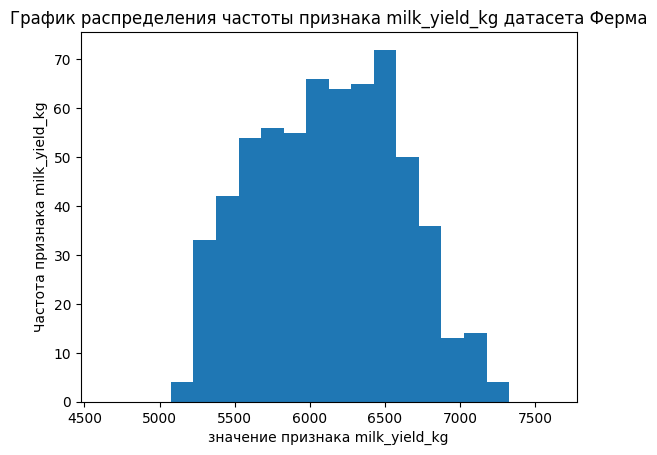

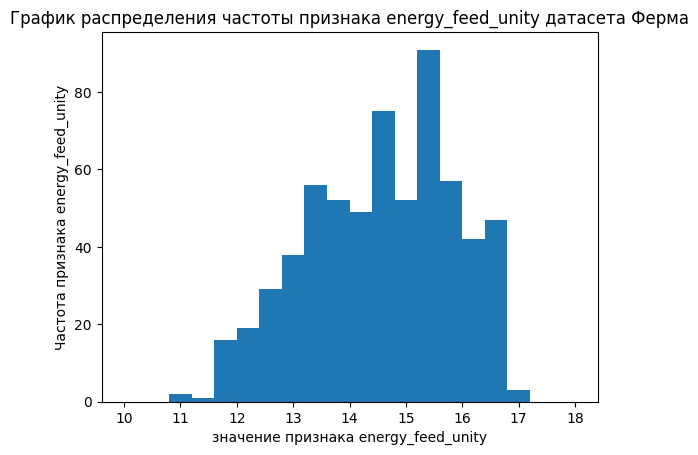

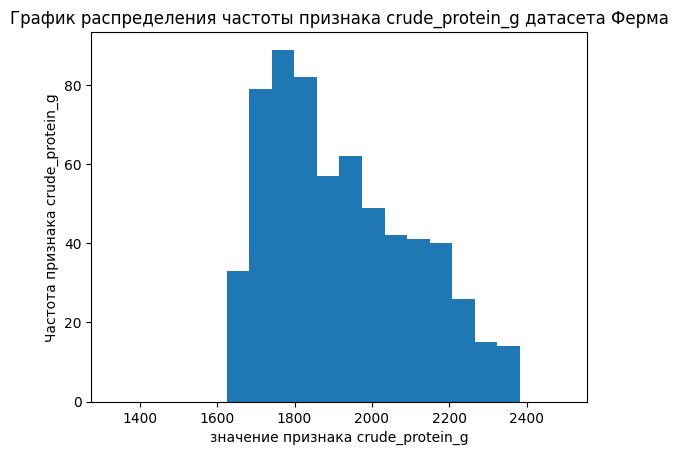

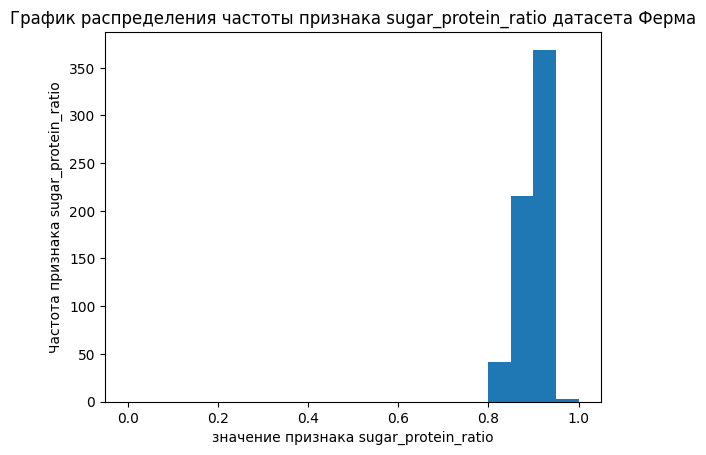

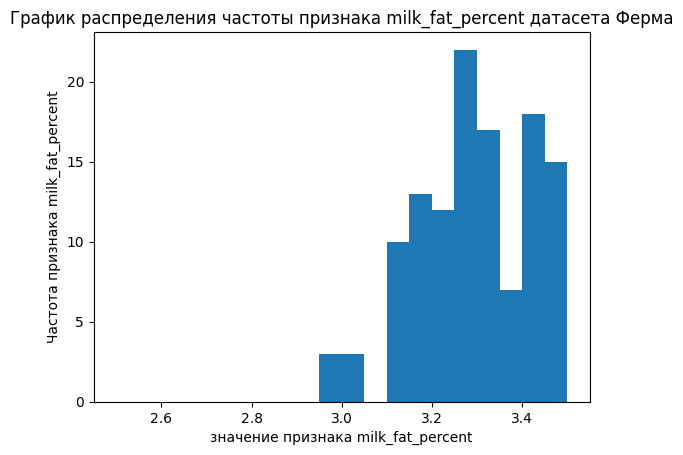

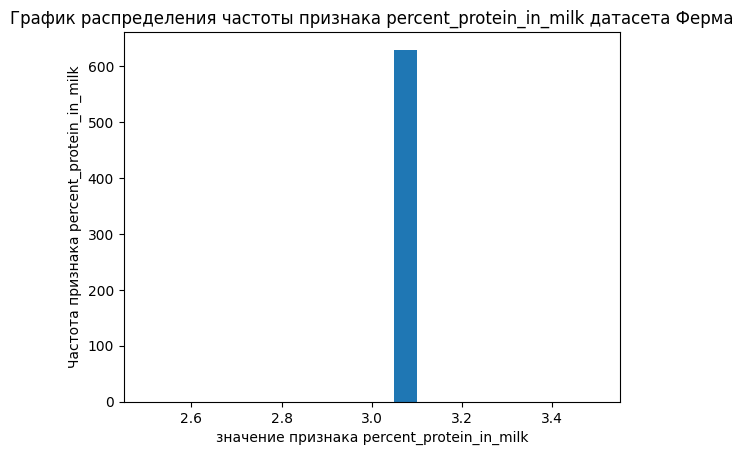

Графики для датасета Коровы для продажи


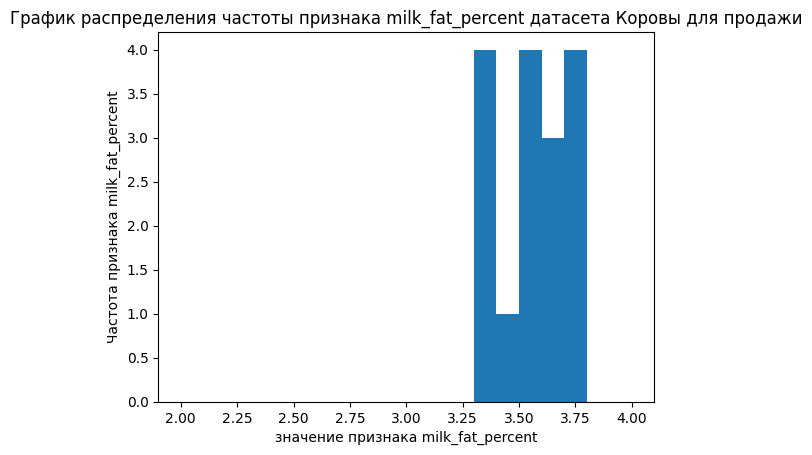

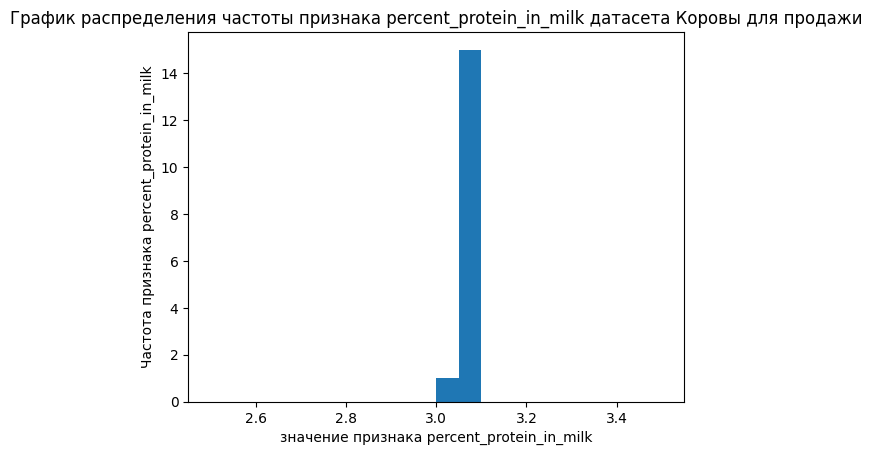

In [128]:

for ind in range(2):
    dataset = (ferma_df, cow_buy_df)[ind]
    dataset_name= ('Ферма', 'Коровы для продажи')[ind]
    
    print(f'Графики для датасета {dataset_name}')
    for col in numeric_columns:
        try:
            quantil_75 = dataset[col].quantile(0.75)
            quantil_25 = dataset[col].quantile(0.25)
            min_val = int(quantil_25- 1.5*(quantil_75-quantil_25))
            max_val= int(quantil_75 +  1.5*(quantil_75-quantil_25))
            plt.hist(dataset[col], 
                    bins=20, 
                    range=(min_val, max_val))
            plt.title(f'График распределения частоты признака {col} датасета {dataset_name}')
            plt.xlabel(f'значение признака {col}')
            plt.ylabel(f'Частота признака {col}')
            plt.show()
            
        except KeyError:
            continue

    